# **Facial Emotion Detection**

## **Executive Summary**

* Facial emotion detection is an important problem to solve for businesses to understand the impact their product or service has on customers in an automated way

* A Convolutional Neural Network with 5 convolutional layers built from scratch and trained on about 12,000 images is able to identify whether the person in the image is happy, sad, surprised, or netural with 77% accuracy

* Final model specification: five convolutional layers with relu activation; a max pooling layer after each convolutional layer; one batch normalization layer; one dropout layer with dropout 30%; one fully connected layer; one output layer with softmax activation

* The model achieves great results for the surprised category - 100% precision and 84% recall, and good results for the happy category - 77% precision and 87% recall.

* The model has a harder time differentiating the sad and neutral categories, achieving a precision and recall between 65 and 69%

## **Problem and Solution Summary**

* The problem: identify images of faces in the test set as belonging to one of four categories - happy, sad, neutral or surprised.

* This is a common problem for many industries trying to understand the impact the product or service has on its customers in an automated way

* Solution: The final model I suggested achieves good accuracy on happy and surprised emotions and decent performance on neutral and sad emotions. I think this is still a useful model to implement because it can differentiate positive from negative emotions with high accuracy and does not take a long time to train or make predictions

* Fine tuning existing models trained on imagenet data was not a good solution for this problem. Without training these complex models from scratch, they achieved poor accuracy because they were not trained on images of faces specifically.

* We can use the five-layer CNN model to tell if our product is having a positive or negative impact on customers. If we need the model to accurately separate neutral from sad emotions I would recommend training the model on more examples and refining the training set to more clearly distinguish the neutral and sad classes.



## **Recommendations for Implementation**

* We can implement this model as-is to distinguish positive from negative/neutral facial expressions with good accuracy.
* I would recommend testing the model with images that highly resemble "production" images that we would expect to see during implementation. If necessary, we could fine tune the model by training on images that resemble production data
* Stakeholders can use the output of this model to understand how the product is impacting customers. If many customers are expressing sad/neutral emotions, we may need to change the product to give a more positive experience
* Benefits - the model is very good at identifying happy and surprised emotions. It is quick to train and give predictions.
* Costs - the model is not good at separating neutral from sad emotions. If this is of high importance, we should refine the training set and retrain the model until it gives better accuracy on this category. The model requires a lot of data to train.
* Risks and challenges - in addition to the sad/neutral classification issue, the photos we collect once the model is impelemented might not resemble the photos the model was trained on. We may need to fine tune the model further to achieve good production results.
* Further analysis - does the model perform well on production-like images? Are the four categories of emotions the model can distinguish enough to be useful, or do we need more categories?



## **Problem Definition**

**The context:** Why is this problem important to solve?<br>

Facial emotion detection can play an important role in understanding a customer's reaction to a product or service in an automated way

**The objectives:** What is the intended goal?<br>

The goal is to categorize the images of faces in the test dataset into one of four categories based on the emotion displayed on the face. Is the person in the image experiencing happy, sad, surprised, or neutral emotions

**The key questions:** What are the key questions that need to be answered?<br>

Is it possible to solve this problem adequately with deep learning? If so, which deep learning technique is the best for categorizing the photos?

**The problem formulation:** What are we trying to solve using data science?

How can we categorize the images of faces into the correct emotion?

## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
# For working with file paths
import os

# For processing zipfiles
import zipfile

# Basic analytics packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import tensorflow
import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend

# For one-hot encoding
from tensorflow.keras.utils import to_categorical

# keras Image processing
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Extract images from zipfile

with zipfile.ZipFile('/content/drive/MyDrive/Facial_emotion_images.zip', 'r') as zip_ref:
  zip_ref.extractall()

### **Removing a Non-Facial Image from the Test Set**

I examined all the photos in the test set manually and noticed this image which was a picture of error text and not a picture of a face. I removed this image from the directory and re-zipped the file

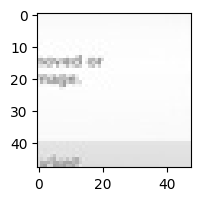

In [ ]:
# Display the image from the test set that was removed

plt.figure(figsize=(2,2))
img = load_img('/content/drive/MyDrive/15838.jpg')
plt.imshow(img)
plt.show()

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

In [ ]:
folder_path = 'Facial_emotion_images_clean/'

# A few functions for visualizing images

# Helper function to get the image folder path (ex: Facial_emotion_images/train/happy)
def get_segment_folder_path(segment, emotion, path=folder_path):
  return os.path.join(path, segment, emotion)

# Helper function to get the sorted list of images
def get_image_list(segment, emotion, path=folder_path):
  segment_folder_path = get_segment_folder_path(segment, emotion, path=folder_path)
  image_list = os.listdir(segment_folder_path)
  image_list.sort()
  return image_list

# Putting together the helper functions to get the ith image path
def get_image_path(segment, emotion, i, path=folder_path):

  # Get the segment folder path
  segment_folder_path = get_segment_folder_path(segment, emotion, path)

  # Get the sorted list of images available
  image_list = get_image_list(segment, emotion, path)

  # Get the image file name for the ith image
  image_file_name = image_list[i]

  # Return the complete path for the ith image - segment folder + image name
  return os.path.join(segment_folder_path, image_file_name)


### **Happy**

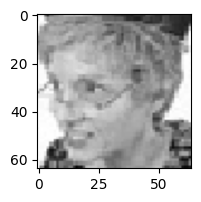

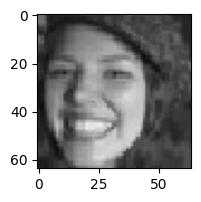

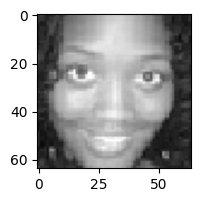

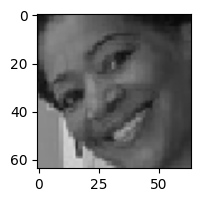

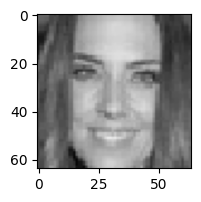

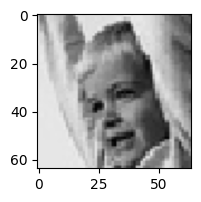

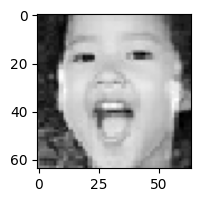

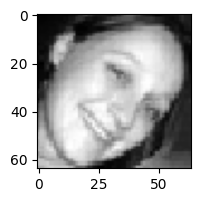

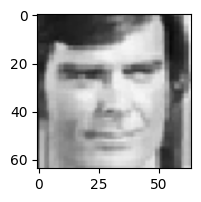

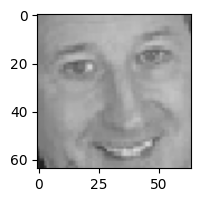

In [ ]:
# Plot the first 10 images under train/happy

for i in range(10):
  plt.figure(figsize=(2,2))
  image_path = get_image_path('train', 'happy', i)
  img = load_img(image_path, target_size=(64,64))
  plt.imshow(img)
  plt.show()

**Observations and Insights:__**

* Most of the happy images have an open mouth or a smile with teeth - this seems like the most definitive feature of the happy faces
* Mouth is upturned at the corners
* Eyes are upturned at the corners
* Eyebrows often slightly lifted
* Image 9 does not look clearly like a happy face. The brow is furrowed, but the mouth is still forming a bit of a smile. I'm curious how the model will handle less obvious examples like this one

### **Sad**

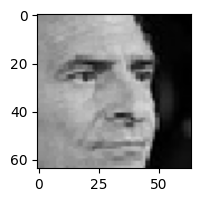

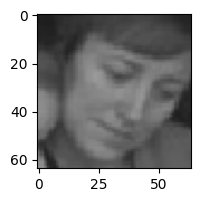

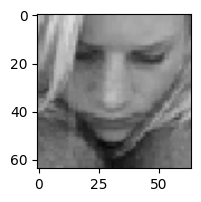

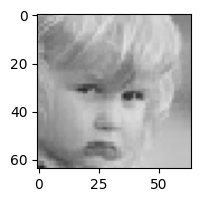

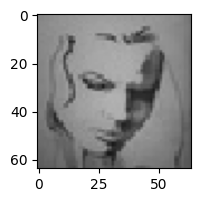

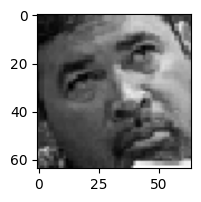

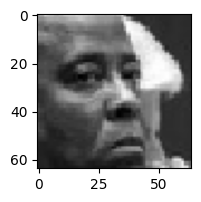

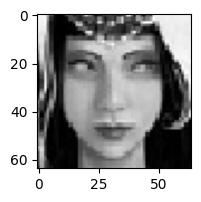

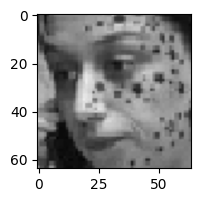

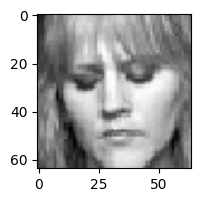

In [ ]:
# Plot the first 10 images under train/sad

for i in range(10):
  plt.figure(figsize=(2,2))
  image_path = get_image_path('train', 'sad', i)
  img = load_img(image_path, target_size=(64,64))
  plt.imshow(img)
  plt.show()

**Observations and Insights:__**
* Corners of the mouth are going down, forming a frown
* Eyes are usually closed or looking down
* Face is often tilted down
* Brow is furrowed

### **Neutral**

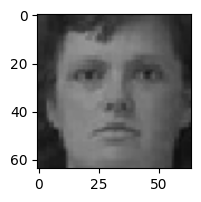

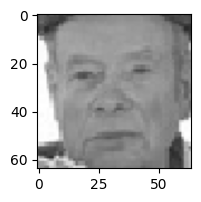

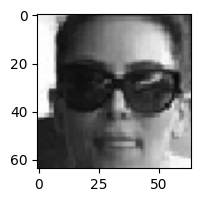

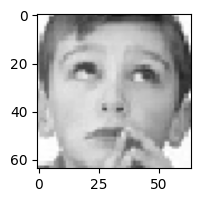

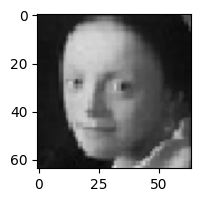

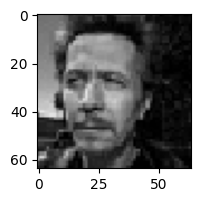

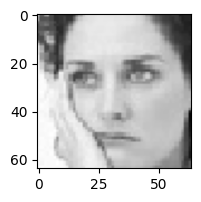

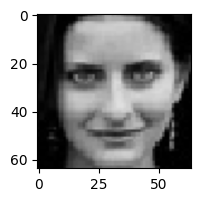

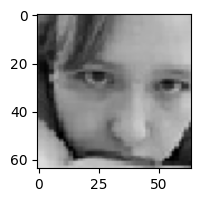

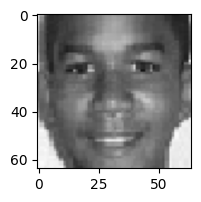

In [ ]:
# Plot the first 10 images under train/neutral

for i in range(10):
  plt.figure(figsize=(2,2))
  image_path = get_image_path('train', 'neutral', i)
  img = load_img(image_path, target_size=(64,64))
  plt.imshow(img)
  plt.show()

**Observations and Insights:__**
* Mouth is more straight across then upturned into a smile or downturned into a frown
* People are usually looking straight ahead at the camera
* Brow is neutral
* Some of these faces look somewhat happy or sad to me. It might be hard for the algorithm to categorize these as neutral

### **Surprised**

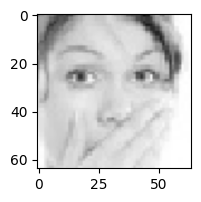

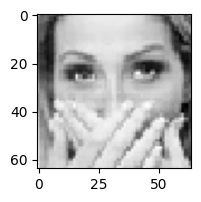

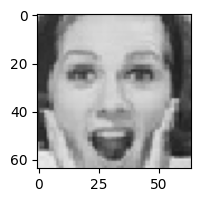

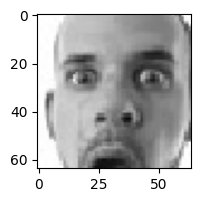

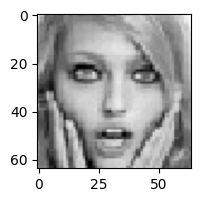

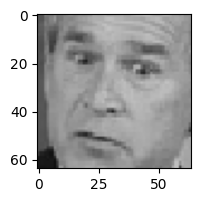

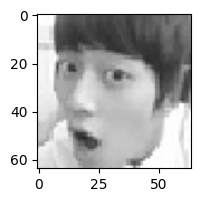

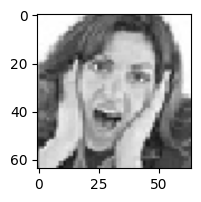

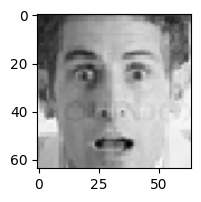

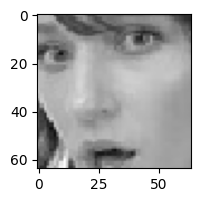

In [ ]:
# Plot the first 10 images under train/surprise

for i in range(10):
  plt.figure(figsize=(2,2))
  image_path = get_image_path('train', 'surprise', i)
  img = load_img(image_path, target_size=(64,64))
  plt.imshow(img)
  plt.show()

**Observations and Insights:__**
* Hands are often visible near the face - this is the only emotion where I have seen hands visible. I would expect the algorithm to pick up on this first as it's very definitive
* Mouth is open but not upturned
* Eyes are wide
* Brows are lifted
* Face is usually looking straight ahead toward the camera

## **Checking Distribution of Classes**

In [ ]:
happy_count = len(get_image_list('train', 'happy'))
sad_count = len(get_image_list('train', 'sad'))
neutral_count = len(get_image_list('train', 'neutral'))
surprise_count = len(get_image_list('train', 'surprise'))

emotion_count_df = pd.DataFrame()
emotion_count_df['emotion'] = ['happy', 'sad', 'neutral', 'surprise']
emotion_count_df['image_count'] = [happy_count, sad_count, neutral_count, surprise_count]


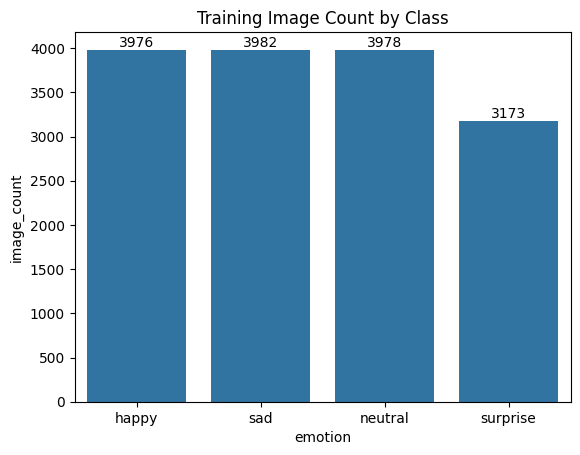

In [ ]:
ax = sns.barplot(emotion_count_df, x='emotion', y='image_count')
ax.bar_label(ax.containers[0])
plt.title('Training Image Count by Class')
plt.show()

**Observations and Insights:__**
* happy, sad, and neutral labels all have almost 4,000 examples while the surprise label only has 3,100 examples
* The imbalance is not too extreme and I don't expect to have problems due to it
* If the model has trouble identifying the "surprise" category I could try up-sampling, including 800 more examples from the surprise category by sampling with replacement, to balance the classes
* I don't think there is any further exploratory data analysis to do here since the data is unstructured

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?

The classes are not equally distributed, but I don't think the imbalance is too high. If the model has trouble identifying the "surprise" class, we could resample the images with rotation or use other techniques to try and help with class imbalance


* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

I checked the number of images in the validation and test sets, and they look balanced. There is not any metadata to analyze here and all the data is unstructured, so I don't think we can do any other exploratory data analysis

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
batch_size  = 32
img_size = 48

# Trainig data generator
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

# Create the training set using grayscale color mode
train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (48, 48),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

# Validation image generator
datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

# Create the validation set using grayscale color mode
validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size = (48, 48),
                                                        color_mode = 'grayscale',
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        shuffle=False)

# Test image generator
datagen_test = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range=(0.,2.),
                                  rescale = 1./255,
                                  shear_range=0.3)

# Create the test set using grayscale color mode
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size = (48, 48),
                                            color_mode = 'grayscale',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?

I think convolutional neural networks make sense here because they are a well-known technique for analyzing image data. The nxn filters we use to pass over the image can learn spatial patterns that the artificial neural network cannot

* What are the advantages of CNNs over ANNs and are they applicable here?

CNNs are more computationally efficient than ANNs because the convolutional layers share parameters. This is applicable here because we are doing an image classification task.

CNNs are also uniquely suited for solving image classification problems because they can pick up on visual/spatial features in the images that ANNs cannot

### **Creating the Base Neural Network**

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(100)
random.seed(100)
tf.random.set_seed(100)

In [ ]:
def cnn_model_1():

  # Define a sequential model
  model = Sequential()

  # Convolutional layer with 32 filters and kernel size of 3x3
  model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48, 48, 1)))

  # LeakyReLU layer with slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))

  # Dropout
  model.add(Dropout(0.2))

  # Max pooling layer
  model.add(MaxPooling2D(2,2))

  # Batch Normalization
  model.add(BatchNormalization())

  # Second convolutional layer with 32 filters and kernel size of 3x3 with same padding
  model.add(Conv2D(32, (3,3), padding="same"))

  # LeakyReLU with slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))

  # Dropout
  model.add(Dropout(0.2))

  # Max pooling layer
  model.add(MaxPooling2D(2,2))

  # Max pooling layer
  model.add(MaxPooling2D(2,2))

  # Batch Normalization
  model.add(BatchNormalization())

  # flatten the output of the conv layer after max pooling
  model.add(Flatten())

  # Dense layer with 32 nodes
  model.add(Dense(32, activation='relu'))

  # Output layer
  model.add(Dense(4, activation='softmax'))

  # Optimizer
  opt = Adam(learning_rate=0.001)

  # Compile model
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
cnn_model_1 = cnn_model_1()

In [ ]:
cnn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 32)        0         
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 24, 24, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9

### **Compiling and Training the Model**

In [ ]:
# fit the model and save history so we can analyze it later

history = cnn_model_1.fit(
    train_set,
    validation_data=validation_set,
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
473/473 [==============================] - 78s 160ms/step - loss: 1.2230 - accuracy: 0.4442 - val_loss: 1.2541 - val_accuracy: 0.4541
Epoch 2/20
473/473 [==============================] - 75s 159ms/step - loss: 1.0372 - accuracy: 0.5472 - val_loss: 1.0217 - val_accuracy: 0.5650
Epoch 3/20
473/473 [==============================] - 75s 159ms/step - loss: 0.9737 - accuracy: 0.5791 - val_loss: 1.0038 - val_accuracy: 0.5813
Epoch 4/20
473/473 [==============================] - 78s 166ms/step - loss: 0.9329 - accuracy: 0.6004 - val_loss: 0.9017 - val_accuracy: 0.6257
Epoch 5/20
473/473 [==============================] - 76s 161ms/step - loss: 0.9005 - accuracy: 0.6192 - val_loss: 0.9334 - val_accuracy: 0.6203
Epoch 6/20
473/473 [==============================] - 83s 176ms/step - loss: 0.8813 - accuracy: 0.6239 - val_loss: 0.9203 - val_accuracy: 0.6124
Epoch 7/20
473/473 [==============================] - 75s 158ms/step - loss: 0.8526 - accuracy: 0.6448 - val_loss: 0.8800 - val_ac

In [ ]:
# save the fitted model in case we need it later

cnn_model_1.save('/content/drive/MyDrive/facial_recognition_models/cnn_model_1.h5')

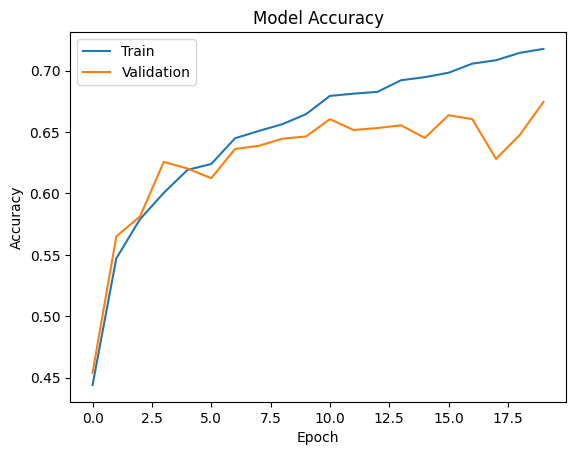

In [ ]:
# Plot training vs validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the Model on the Test Set**

In [ ]:
# Evaluate model accuracy on the test set

cnn_model_1.evaluate(test_set)

4/4 [==============================] - 1s 87ms/step - loss: 0.7923 - accuracy: 0.6719


[0.7922799587249756, 0.671875]

In [ ]:
# Create predictions from the test set

y_pred = cnn_model_1.predict(test_set)

4/4 [==============================] - 0s 37ms/step


In [ ]:
# Assign a a label on the test set based on the highest score per class

y_pred_labels = y_pred.argmax(-1)

In [ ]:
# Get the order of class labels

test_set.class_indices.keys()

dict_keys(['happy', 'neutral', 'sad', 'surprise'])

In [ ]:
# Import metric reports from scikit-learn

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Print the classification report

print(classification_report(test_set.classes, y_pred_labels))

              precision    recall  f1-score   support

           0       0.69      0.78      0.74        32
           1       0.55      0.69      0.61        32
           2       0.53      0.31      0.39        32
           3       0.85      0.88      0.86        32

    accuracy                           0.66       128
   macro avg       0.65      0.66      0.65       128
weighted avg       0.65      0.66      0.65       128



[Text(0, 0.5, 'happy'),
 Text(0, 1.5, 'neutral'),
 Text(0, 2.5, 'sad'),
 Text(0, 3.5, 'surprise')]

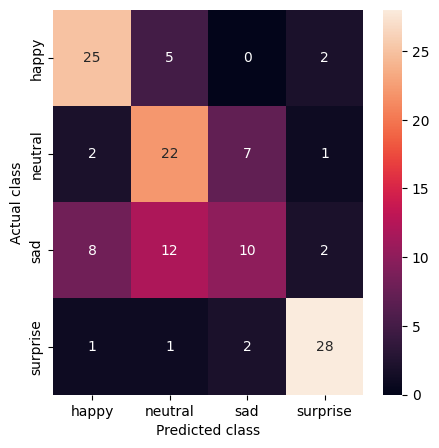

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(test_set.classes, y_pred_labels)

# Plot the confusion matrix as a heat map
plt.figure(figsize=(5,5))

ax = plt.subplot()

sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Actual class')
ax.xaxis.set_ticklabels(['happy', 'neutral', 'sad', 'surprise'])
ax.yaxis.set_ticklabels(['happy', 'neutral', 'sad', 'surprise'])

**Observations and Insights:__**

* The model achieves an overall accuracy of 65%. This is much better than random chance, but probably not good enough to use depending on the application
* The "surprised" class has the best preicision at 88% and best recall at 88% despite having a lower volume of training examples. This is probably because the surprised photos look quite distinct
* The "neutral" and "sad" classes have the worst precision around 55%. They are often confused with one another. This makes sense because the difference between sad and neutral is subtle
* The "sad" class has extremely poor recall at only 31%. When the photo is actually sad, it has about an equal chance of being predicted as sad, happy, or neutral. The model is only certain that the "sad" photos are not "surprise" photos
* The model seems to be overfitting some. The gap between training and validation is widening as the epochs continue. I want to try a larger dropout percentage and see if that helps


### **Creating the second Convolutional Neural Network**

- Increase the number of filters in the first and second convolutional layer
- Add a third convolutional layer with 32 filters
- Increase the dropout percentage
- Add more nodes to the fully connected layer before the softmax layer

In [ ]:
def build_cnn_model_2():

  # Define a sequential model
  model = Sequential()

  # Convolutional layer with 128 filters and kernel size of 3x3
  model.add(Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(48, 48, 1)))

  # LeakyReLU layer with slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))

  # Dropout
  model.add(Dropout(0.5))

  # Max pooling layer
  model.add(MaxPooling2D(2,2))

  # Batch Normalization
  model.add(BatchNormalization())

  # Second convolutional layer with 64 filters and kernel size of 3x3 with same padding
  model.add(Conv2D(64, (3,3), padding="same"))

  # LeakyReLU with slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))

  # Dropout
  model.add(Dropout(0.4))

  # Max pooling layer
  model.add(MaxPooling2D(2,2))

  # Batch Normalization
  model.add(BatchNormalization())

  # Third convolutional layer with 32 filters and kernel size of 3x3 with same padding
  model.add(Conv2D(32, (3,3), padding="same"))

  # LeakyReLU with slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))

  # Dropout
  model.add(Dropout(0.2))

  # Max pooling layer
  model.add(MaxPooling2D(2,2))

  # Batch Normalization
  model.add(BatchNormalization())

  # flatten the output of the conv layer after max pooling
  model.add(Flatten())

  # Dense layer with 128 nodes
  model.add(Dense(128, activation='relu'))

  # Output layer
  model.add(Dense(4, activation='softmax'))

  # Optimizer
  opt = Adam(learning_rate=0.001)

  # Compile model
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

### **Compiling and Training the Model**

In [ ]:
cnn_model_2 = build_cnn_model_2()

In [ ]:
cnn_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 48, 48, 128)       0         
                                                                 
 dropout_2 (Dropout)         (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 24, 24, 128)       512       
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
# Stop the model early if the loss stops improving

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Fit the model and save each epoch results to history

history = cnn_model_2.fit(
    train_set,
    validation_data=validation_set,
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[callback]
)

Epoch 1/20
473/473 [==============================] - 319s 664ms/step - loss: 1.3535 - accuracy: 0.3954 - val_loss: 1.2255 - val_accuracy: 0.4434
Epoch 2/20
473/473 [==============================] - 303s 641ms/step - loss: 1.0941 - accuracy: 0.5141 - val_loss: 1.1432 - val_accuracy: 0.5144
Epoch 3/20
473/473 [==============================] - 282s 596ms/step - loss: 1.0067 - accuracy: 0.5609 - val_loss: 1.0792 - val_accuracy: 0.5268
Epoch 4/20
473/473 [==============================] - 280s 591ms/step - loss: 0.9426 - accuracy: 0.5968 - val_loss: 1.1378 - val_accuracy: 0.4874
Epoch 5/20
473/473 [==============================] - 279s 590ms/step - loss: 0.8951 - accuracy: 0.6172 - val_loss: 0.9574 - val_accuracy: 0.5849
Epoch 6/20
473/473 [==============================] - 283s 598ms/step - loss: 0.8579 - accuracy: 0.6323 - val_loss: 0.9397 - val_accuracy: 0.6060
Epoch 7/20
473/473 [==============================] - 282s 596ms/step - loss: 0.8200 - accuracy: 0.6558 - val_loss: 0.9553 -

### **Evaluating the Model on the Test Set**

In [ ]:
# Get predicted probabilities of each class
y_pred = cnn_model_2.predict(test_set)

# Get the class labels
y_pred_labels = y_pred.argmax(-1)

# Print the classification report
print(classification_report(test_set.classes, y_pred_labels))

4/4 [==============================] - 1s 162ms/step
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.64      0.56      0.60        32
           2       0.67      0.62      0.65        32
           3       0.70      0.81      0.75        32

    accuracy                           0.70       128
   macro avg       0.70      0.70      0.70       128
weighted avg       0.70      0.70      0.70       128



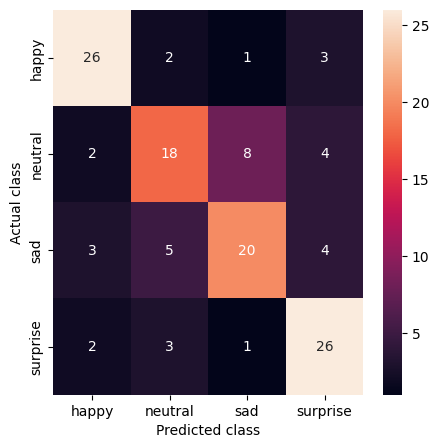

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(test_set.classes, y_pred_labels)

# Plot the confusion matrix as a heat map
plt.figure(figsize=(5,5))

ax = plt.subplot()

sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Actual class')
ax.xaxis.set_ticklabels(['happy', 'neutral', 'sad', 'surprise'])
ax.yaxis.set_ticklabels(['happy', 'neutral', 'sad', 'surprise'])
plt.show()

**Observations and Insights:__**

* This model performed slightly better on the test set, achieving 70% accuracy
* The happy and surprise classes have better purity than the last model when we look at the confusion matrix
* The model is still confusing sad and neutral expressions at a high rate

## **Trying the RGB color mode on CNN Model 2**

### **Creating the Data Loaders**

In [ ]:
batch_size  = 32
img_size = 48

# Training data image generator
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                   shear_range=0.3)

# Training set with color mode rgb
train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (48, 48),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

# Validation data image generator
datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

# Validation set with color mode rgb
validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size = (48, 48),
                                                        color_mode = 'rgb',
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        shuffle=False)
# Test set image generator
datagen_test = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range=(0.,2.),
                                  rescale = 1./255,
                                  shear_range=0.3)

# Test set with color mode rgb
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size = (48, 48),
                                            color_mode = 'rgb',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 127 images belonging to 4 classes.


### **Define Model Architecture**

In [ ]:
# Same architecture as cnn model 2 but with 3 channels in the input layer
def build_ccn_model_rgb():

  # Define a sequential model
  model = Sequential()

  # Convolutional layer with 128 filters and kernel size of 3x3
  model.add(Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(48, 48, 3)))

  # LeakyReLU layer with slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))

  # Dropout
  model.add(Dropout(0.5))

  # Max pooling layer
  model.add(MaxPooling2D(2,2))

  # Batch Normalization
  model.add(BatchNormalization())

  # Second convolutional layer with 64 filters and kernel size of 3x3 with same padding
  model.add(Conv2D(64, (3,3), padding="same"))

  # LeakyReLU with slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))

  # Dropout
  model.add(Dropout(0.4))

  # Max pooling layer
  model.add(MaxPooling2D(2,2))

  # Batch Normalization
  model.add(BatchNormalization())

  # Third convolutional layer with 32 filters and kernel size of 3x3 with same padding
  model.add(Conv2D(32, (3,3), padding="same"))

  # LeakyReLU with slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))

  # Dropout
  model.add(Dropout(0.2))

  # Max pooling layer
  model.add(MaxPooling2D(2,2))

  # Batch Normalization
  model.add(BatchNormalization())

  # flatten the output of the conv layer after max pooling
  model.add(Flatten())

  # Dense layer with 128 nodes
  model.add(Dense(128, activation='relu'))

  # Output layer
  model.add(Dense(4, activation='softmax'))

  # Optimizer
  opt = Adam(learning_rate=0.001)

  # Compile model
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model


### **Compile and Fit the Model**

In [ ]:
cnn_model_rgb = build_ccn_model_rgb()

In [ ]:
# Save the best model
checkpoint = ModelCheckpoint('/content/drive/MyDrive/facial_recognition_models/cnn_model_rgb.keras',
                             monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'max')

# Stop early if the validation loss stops improving
early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )


callbacks_list = [early_stopping, checkpoint]

# Fit the model and save the history
history = cnn_model_rgb.fit(
    train_set,
    validation_data=validation_set,
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[callback]
)

Epoch 1/20
473/473 [==============================] - 30s 55ms/step - loss: 1.3466 - accuracy: 0.4071 - val_loss: 1.2123 - val_accuracy: 0.4531
Epoch 2/20
473/473 [==============================] - 26s 54ms/step - loss: 1.0948 - accuracy: 0.5102 - val_loss: 1.3212 - val_accuracy: 0.3990
Epoch 3/20
473/473 [==============================] - 26s 54ms/step - loss: 1.0186 - accuracy: 0.5540 - val_loss: 1.0003 - val_accuracy: 0.5843
Epoch 4/20
473/473 [==============================] - 25s 54ms/step - loss: 0.9605 - accuracy: 0.5803 - val_loss: 0.9567 - val_accuracy: 0.6084
Epoch 5/20
473/473 [==============================] - 26s 55ms/step - loss: 0.9070 - accuracy: 0.6119 - val_loss: 0.9488 - val_accuracy: 0.6056
Epoch 6/20
473/473 [==============================] - 25s 54ms/step - loss: 0.8732 - accuracy: 0.6274 - val_loss: 1.0025 - val_accuracy: 0.5686
Epoch 7/20
473/473 [==============================] - 26s 54ms/step - loss: 0.8305 - accuracy: 0.6516 - val_loss: 0.9138 - val_accuracy:

### **Evauate CNN Model 2 with RGB Color Mode**

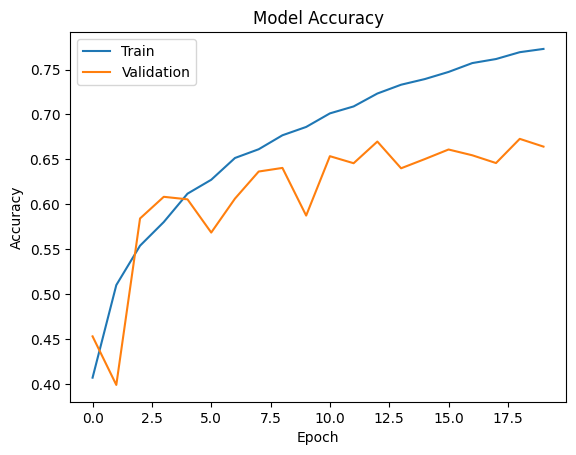

In [ ]:
# Plot training vs validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Get predicted probabilities
y_pred = cnn_model_rgb.predict(test_set)

# Get the prediction labels
y_pred_labels = y_pred.argmax(-1)

# Print the classification report
print(classification_report(test_set.classes, y_pred_labels))

4/4 [==============================] - 0s 89ms/step
              precision    recall  f1-score   support

           0       0.61      0.81      0.69        31
           1       0.55      0.53      0.54        32
           2       0.64      0.44      0.52        32
           3       0.79      0.81      0.80        32

    accuracy                           0.65       127
   macro avg       0.65      0.65      0.64       127
weighted avg       0.65      0.65      0.64       127



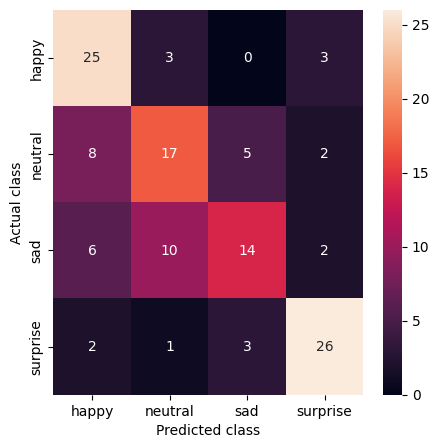

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(test_set.classes, y_pred_labels)

# Plot the confusion matrix as a heat map
plt.figure(figsize=(5,5))

ax = plt.subplot()

sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Actual class')
ax.xaxis.set_ticklabels(['happy', 'neutral', 'sad', 'surprise'])
ax.yaxis.set_ticklabels(['happy', 'neutral', 'sad', 'surprise'])
plt.show()

**Conclusions about RGB Color Mode**

* The model does a good job identifying "happy" and "surprised" emotions and has a harder time with "sad" and "neutral". This is similar to the model in grayscale color mode
* This model performed slightly worse than the model with the same architecture with "grayscale" as the color mode
* This makes sense to me because the original images are grayscale
* This model is also overfitting - there is a gap between the training accuracy and validation accuracy


## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?

The models achieved an accuracy around 70%. This is probably not good enough for most applications.

The models tend to overfit. I think we could achieve better performance with more training data to support the complex model architecture.

The models have a difficult time differentiating sad and neutral emotions. Looking at the training images myself, I also think some of the neutral emotions could be classified as happy or sad. It's difficult to correctly classify the photos by emotion without more context, which means it will be difficult for machine learning algorithms as well.


* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

The grayscale color mode provided better overall performance. I think this makes sense because the original images are grayscale. Using rgb color mode means we are inferring colors that are not necessarily "right" based on the original image

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                        brightness_range = (0., 2.),
                                        rescale = 1./255,
                                        shear_range = 0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = False)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = False)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 127 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

# Add classification layers on top of it

# Flattening the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer.output)

# Adding a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

vggmodel = Model(vgg.input, pred) # Initializing the model

In [ ]:
for layer in vggmodel.layers:
  print(layer.name, layer.trainable)

input_3 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
flatten_9 True
dense_36 True
dense_37 True
dropout_9 True
dense_38 True
batch_normalization_9 True
dense_39 True


In [ ]:
vggmodel.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

### **Compiling and Training the VGG16 Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Save checkpoints
checkpoint = ModelCheckpoint('/content/drive/MyDrive/facial_recognition_models/vgg_model_1.keras',
                             monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'max')

# Stop the model early if validation loss stops improving over 3 epochs
early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

# Reduce the learning rate if validation loss begins to plateau
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

# Optimizer
opt = Adam(learning_rate=0.001)

# Compile model
vggmodel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model and save the history
history = vggmodel.fit(
    train_set,
    validation_data=validation_set,
    epochs=epochs,
    batch_size=32,
    verbose=1,
    callbacks=callbacks_list
)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.2276 - accuracy: 0.4358
Epoch 1: val_loss improved from -inf to 1.15037, saving model to /content/drive/MyDrive/facial_recognition_models/vgg_model_1.keras
473/473 [==============================] - 519s 1s/step - loss: 1.2276 - accuracy: 0.4358 - val_loss: 1.1504 - val_accuracy: 0.4878 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.1876 - accuracy: 0.4649
Epoch 2: val_loss improved from 1.15037 to 1.31435, saving model to /content/drive/MyDrive/facial_recognition_models/vgg_model_1.keras
473/473 [==============================] - 513s 1s/step - loss: 1.1876 - accuracy: 0.4649 - val_loss: 1.3144 - val_accuracy: 0.4063 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1716 - accuracy: 0.4728
Epoch 3: val_loss did not improve from 1.31435
473/473 [==============================] - 513s 1s/step - loss: 1.1716 - accuracy: 0.4728 - val_loss: 1.2109

### **Evaluating the VGG16 model**

In [ ]:
vgg_model_1 = tf.keras.models.load_model('/content/drive/MyDrive/facial_recognition_models/vgg_model_1.keras')

# Evaluate on the test set
vgg_model_1.evaluate(test_set)

4/4 [==============================] - 6s 1s/step - loss: 1.2077 - accuracy: 0.4724


[1.2076754570007324, 0.4724409580230713]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = vgg_model_1.predict(test_set)
y_pred_labels = y_pred.argmax(-1)

print(classification_report(test_set.classes, y_pred_labels))

4/4 [==============================] - 5s 1s/step
              precision    recall  f1-score   support

           0       0.50      0.10      0.16        31
           1       0.28      0.34      0.31        32
           2       0.31      0.47      0.37        32
           3       0.59      0.59      0.59        32

    accuracy                           0.38       127
   macro avg       0.42      0.38      0.36       127
weighted avg       0.42      0.38      0.36       127



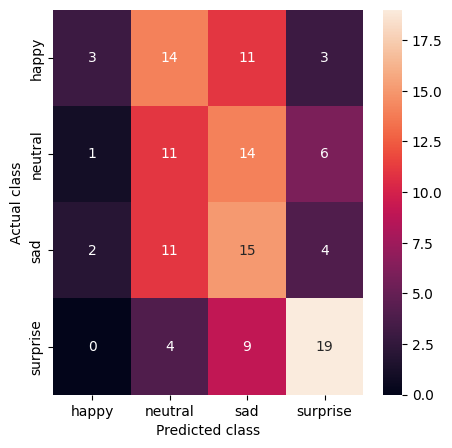

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(test_set.classes, y_pred_labels)

# Plot the confusion matrix as a heat map
plt.figure(figsize=(5,5))

ax = plt.subplot()

sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Actual class')
ax.xaxis.set_ticklabels(['happy', 'neutral', 'sad', 'surprise'])
ax.yaxis.set_ticklabels(['happy', 'neutral', 'sad', 'surprise'])
plt.show()

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**

* Training performance is poor and does not improve with more epochs. Early stopping stopped the model after 4 epochs due to lack of improvement
* Validation improvement is also poor and not improving
* I think this is happening because the convolution layers for VGG learned patterns from image_net images and not from the photos of faces we have in the training set. Adding a few fully connected layers is not enough for the model to learn patterns from the facial photos
* However, the model does better than random by having an accuracy of 42%.
* The precision and recall for the surprise class is decent at around 60%

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                      

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable=False

# Add classification layers on top of it

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer_Resnet.output)

# Add a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation='relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation = 'softmax')(x)

resnetmodel = Model(Resnet.input, pred) # Initializing the model

In [ ]:
resnetmodel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('/content/drive/MyDrive/facial_recognition_models/resnet_model_1.keras',
                             monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

# Optimizer
opt = Adam(learning_rate=0.001)

# Compile model
resnetmodel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### **Evaluating the ResNet Model**

In [ ]:
history = resnetmodel.fit(
    train_set,
    validation_data=validation_set,
    epochs=epochs,
    batch_size=32,
    verbose=1,
    callbacks=callbacks_list
)

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.4930 - accuracy: 0.2532
Epoch 1: val_loss improved from -inf to 1.41237, saving model to /content/drive/MyDrive/facial_recognition_models/resnet_model_1.keras
473/473 [==============================] - 43s 68ms/step - loss: 1.4927 - accuracy: 0.2533 - val_loss: 1.4124 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.4061 - accuracy: 0.2592
Epoch 2: val_loss did not improve from 1.41237
473/473 [==============================] - 27s 58ms/step - loss: 1.4060 - accuracy: 0.2592 - val_loss: 1.3955 - val_accuracy: 0.1601 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 1.3972 - accuracy: 0.2581
Epoch 3: val_loss did not improve from 1.41237
473/473 [==============================] - 27s 57ms/step - loss: 1.3971 - accuracy: 0.2584 - val_loss: 1.3677 - val_accuracy: 0.3227 - lr: 0.0010
Epoch 4/20
472/473 [=========================

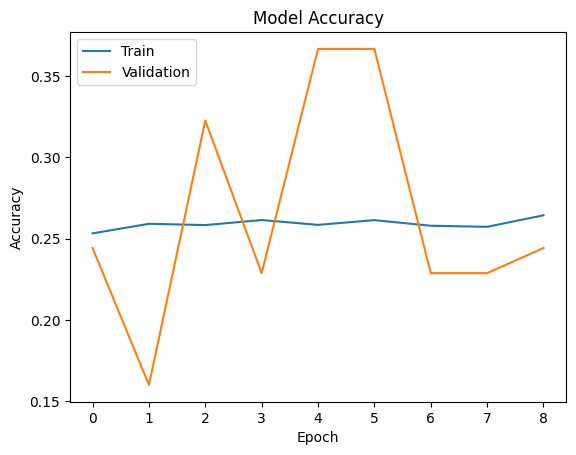

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
resnetmodel.evaluate(test_set)

4/4 [==============================] - 1s 187ms/step - loss: 1.3923 - accuracy: 0.2441


[1.392345905303955, 0.24409449100494385]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = resnetmodel.predict(test_set)
y_pred_labels = y_pred.argmax(-1)

print(classification_report(test_set.classes, y_pred_labels, zero_division=0))

4/4 [==============================] - 0s 46ms/step
              precision    recall  f1-score   support

           0       0.24      1.00      0.39        31
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        32

    accuracy                           0.24       127
   macro avg       0.06      0.25      0.10       127
weighted avg       0.06      0.24      0.10       127



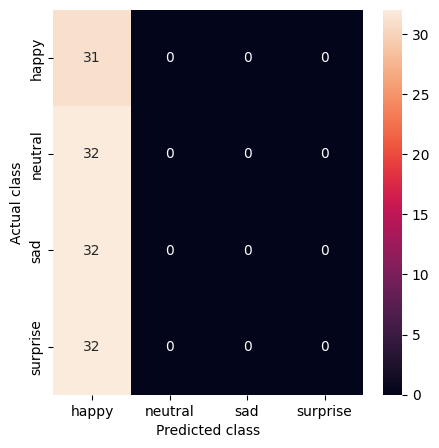

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(test_set.classes, y_pred_labels)

# Plot the confusion matrix as a heat map
plt.figure(figsize=(5,5))

ax = plt.subplot()

sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Actual class')
ax.xaxis.set_ticklabels(['happy', 'neutral', 'sad', 'surprise'])
ax.yaxis.set_ticklabels(['happy', 'neutral', 'sad', 'surprise'])
plt.show()

**Observations and Insights:__**

* The model predicted every photo to be "happy"
* The model is not adding any value - we could get the same result by predicting everything as happy

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))
EfficientNet.summary()

35839040/35839040 [==============================] - 3s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_3[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer_EfficientNet.output)

# Add a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation='relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation = 'softmax')(x)

Efficientnetmodel = Model(EfficientNet.input, pred) # Initializing the model

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('/content/drive/MyDrive/facial_recognition_models/efficientnet_model_1.keras',
                             monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

# Optimizer
opt = Adam(learning_rate=0.001)

# Compile model
Efficientnetmodel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### **Evaluating the EfficientnetNet Model**

In [ ]:
history = Efficientnetmodel.fit(
    train_set,
    validation_data=validation_set,
    epochs=epochs,
    batch_size=32,
    verbose=1,
    callbacks=callbacks_list
)

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.4551 - accuracy: 0.2586
Epoch 1: val_loss improved from -inf to 1.38188, saving model to /content/drive/MyDrive/facial_recognition_models/efficientnet_model_1.keras
473/473 [==============================] - 38s 62ms/step - loss: 1.4552 - accuracy: 0.2583 - val_loss: 1.3819 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.4012 - accuracy: 0.2583
Epoch 2: val_loss did not improve from 1.38188
473/473 [==============================] - 27s 56ms/step - loss: 1.4012 - accuracy: 0.2583 - val_loss: 1.3721 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 1.3981 - accuracy: 0.2587
Epoch 3: val_loss improved from 1.38188 to 1.38243, saving model to /content/drive/MyDrive/facial_recognition_models/efficientnet_model_1.keras
473/473 [==============================] - 27s 57ms/step - loss: 1.3981 - accuracy: 0.25

In [ ]:
Efficientnetmodel.evaluate(test_set)

4/4 [==============================] - 0s 46ms/step - loss: 1.3959 - accuracy: 0.2441


[1.3959319591522217, 0.24409449100494385]

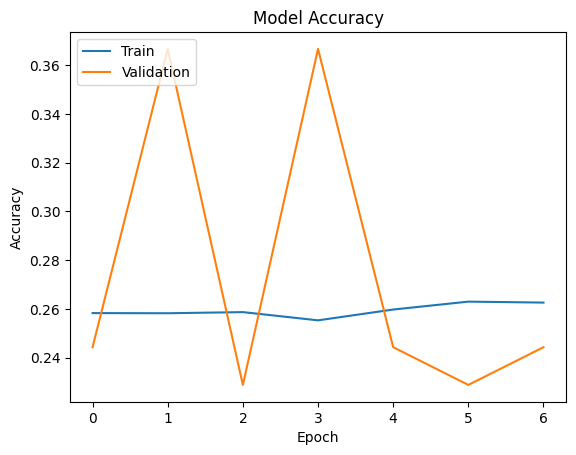

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = Efficientnetmodel.predict(test_set)
y_pred_labels = y_pred.argmax(-1)

print(classification_report(test_set.classes, y_pred_labels, zero_division=0))

4/4 [==============================] - 2s 122ms/step
              precision    recall  f1-score   support

           0       0.24      1.00      0.39        31
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        32

    accuracy                           0.24       127
   macro avg       0.06      0.25      0.10       127
weighted avg       0.06      0.24      0.10       127



**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

* Once again, the model predicts all the test observations to be in the "happy" class
* This model does not add any value, we could achieve the same result by assigning each photo to the "happy" class or doing random guessing

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?

Overall, the transfer learning architectures did not perform better than building CNN models from scratch.

Only the VGG architecture performed better than random. The ResNet and EfficientNet models did not add any value.

I don't think any of the transfer learning models provide enough accuracy to use in a practical context.


* Do you think our issue lies with 'rgb' color_mode?

I don't think the issue lies with the 'rgb' color mode. CNN Model 2 performed only slightly worse when I used rgb color mode instead of grayscale.

I think the issue is that these models are trained to learn patterns based on image net data, not patterns based on the facial images.

If we want these models to learn the facial image patterns better, we could retrain the transfer learning models from the top, including all the convolutional layers.

However, I think the architecture of these models is too complex for the number of training samples we have. I'm already seeing overfitting with only 2-3 convolutional layers and the transfer learning models are much more complex, so we would likely see even more overfitting.

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (48, 48),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size = (48, 48),
                                                        color_mode = 'grayscale',
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        shuffle=False)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range=(0.,2.),
                                  rescale = 1./255,
                                  shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size = (48, 48),
                                            color_mode = 'grayscale',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 127 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
def build_cnn_model_five_layer():

  # Define a sequential model
  model = Sequential()

  # Convolutional layer with 32 filters and kernel size of 3x3
  model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48, 48, 1)))

  # Convolutional layer with 64 filters and kernel size of 3x3
  model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(48, 48, 1)))

  # Max pooling layer
  model.add(MaxPooling2D(2,2))

  # Convolutional layer with 128 filters and kernel size of 3x3
  model.add(Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(48, 48, 1)))

  # Convolutional layer with 128 filters and kernel size of 3x3
  model.add(Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(48, 48, 1)))

  # Max pooling layer
  model.add(MaxPooling2D(2,2))

  # Convolutional layer with 512 filters and kernel size of 3x3
  model.add(Conv2D(512, (3,3), activation='relu', padding='same', input_shape=(48, 48, 1)))

  # Max pooling layer
  model.add(MaxPooling2D(2,2))

  # Batch Normalization
  model.add(BatchNormalization())

  # Dropout
  model.add(Dropout(0.3))

  # flatten the output of the conv layer after max pooling
  model.add(Flatten())

  # Dense layer with 128 nodes
  model.add(Dense(128, activation='relu'))

  # Output layer
  model.add(Dense(4, activation='softmax'))

  # Optimizer
  opt = Adam(learning_rate=0.001)

  # Compile model
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model


### **Compiling and Training the Model**

In [ ]:
cnn_five_layer = build_cnn_model_five_layer()

In [ ]:
cnn_five_layer.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 128)       0         
 g2D)                                                 

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/facial_recognition_models/cnn_five_layer_model.keras',
                             monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )


callbacks_list = [early_stopping, checkpoint]

history = cnn_five_layer.fit(
    train_set,
    validation_data=validation_set,
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[callback]
)

Epoch 1/20
473/473 [==============================] - 21s 38ms/step - loss: 1.2367 - accuracy: 0.4287 - val_loss: 1.2568 - val_accuracy: 0.3603
Epoch 2/20
473/473 [==============================] - 17s 36ms/step - loss: 0.9974 - accuracy: 0.5628 - val_loss: 1.0636 - val_accuracy: 0.5435
Epoch 3/20
473/473 [==============================] - 17s 36ms/step - loss: 0.9014 - accuracy: 0.6157 - val_loss: 0.8639 - val_accuracy: 0.6345
Epoch 4/20
473/473 [==============================] - 17s 37ms/step - loss: 0.8525 - accuracy: 0.6384 - val_loss: 0.8465 - val_accuracy: 0.6460
Epoch 5/20
473/473 [==============================] - 17s 36ms/step - loss: 0.8012 - accuracy: 0.6671 - val_loss: 0.8977 - val_accuracy: 0.6387
Epoch 6/20
473/473 [==============================] - 17s 36ms/step - loss: 0.7608 - accuracy: 0.6834 - val_loss: 0.7959 - val_accuracy: 0.6723
Epoch 7/20
473/473 [==============================] - 17s 36ms/step - loss: 0.7196 - accuracy: 0.7034 - val_loss: 0.8339 - val_accuracy:

### **Evaluating the Model on Test Set**

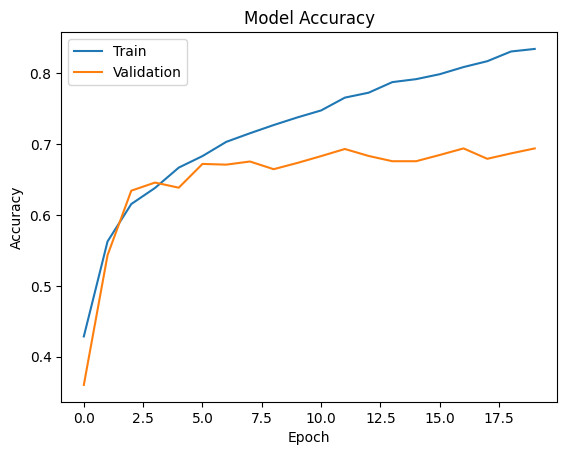

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = cnn_five_layer.predict(test_set)
y_pred_labels = y_pred.argmax(-1)

print(classification_report(test_set.classes, y_pred_labels, zero_division=0))

4/4 [==============================] - 0s 114ms/step
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        31
           1       0.68      0.66      0.67        32
           2       0.65      0.69      0.67        32
           3       1.00      0.84      0.92        32

    accuracy                           0.76       127
   macro avg       0.77      0.76      0.77       127
weighted avg       0.77      0.76      0.77       127



**Observations and Insights:__**

* The model looksl like it could be overfitting based on the training and validation set accuracy, but this model achieved much better performance on the test set
* Accuracy is 77%
* This model achieved 100% precision and 84% recall in the surprise class. This is quite good
* The model also achieved good results for the "happy" class with 77% precision and 87% recall
* The model has a hard time differentiating the "neutral" and "sad" classes - precision and recall are around 65%

### **Plotting the Confusion Matrix for the chosen final model**

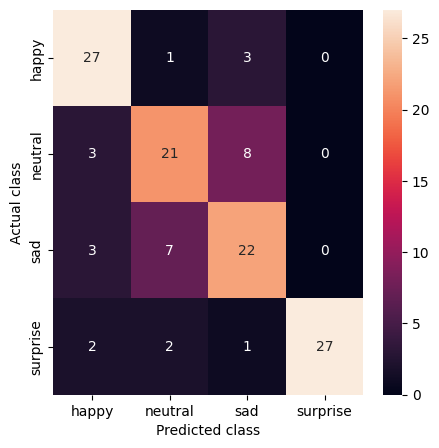

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(test_set.classes, y_pred_labels)

# Plot the confusion matrix as a heat map
plt.figure(figsize=(5,5))

ax = plt.subplot()

sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Actual class')
ax.xaxis.set_ticklabels(['happy', 'neutral', 'sad', 'surprise'])
ax.yaxis.set_ticklabels(['happy', 'neutral', 'sad', 'surprise'])
plt.show()

**Observations and Insights:__**

* This model achieved very good results on the surprise and happy classes.
* The model achieved decent results for the neutral and sad classes, but it still mixes up these two classes the most
* This is the best class purity we've seen on the test set so far

## **Conclusion:____________**

* The 5-layer CNN model achieved the best performance.
* We could use this model to effectively identify "surprised" emotions and maybe "happy" emotions
* The model might need better or more examples differentiating the "neutral" and "sad" classes

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

The computer vision models can identify surprised and happy emotions fairly well, but has a more difficult time with neutral and sad emotions. Depending on the business context, we might want to add more examples in the neutral and sad categories to achieve better model performance on these examples.



### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

Building our own CNN models from scratch seem to work better than using transfer learning from more complex architectures trained on imagenet data.

The grayscale mode tends to work better than the rgb color mode. I think this makes sense as the images are originally grayscale.

There is a gap between the training accuracy and validation accuracy for all the models, suggesting overfitting. The models would benefit from more training data, a less complex architecture, or more regularization/robustness techniques applied.

I think we could improve model performance by providing more samples of neutral and sad emotions, perhaps by rotating the images and resampling them or finding new examples.

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

I would recommend the final model architecture where I used the grayscale color mode and five convolutional blocks. This model achieved excellent results on the "surprised" class, good results on the "happy" class and acceptable results for "sad" and "neutral" based on the test data. This model is trained on the specific problem of facial emotion recognition instead of more general images (image_net), so it achieves better performance. To improve the model further, I would include more "sad" and "neutral" examples or refine the training data more in these categories.